In [1]:
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd
import seaborn as sns

import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time #import libraries

In [2]:
URL='https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
page=requests.get(URL)
page.status_code  #scrap the page from web

200

In [3]:
page.content # content from webpage

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.9e9635.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e82689.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" si

In [4]:
soup=BeautifulSoup(page.content,'html.parser')
print(soup.prettify())  #prettify content of the page

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim2.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.9e9635.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e82689.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57

In [5]:
name=soup.find('div',class_="_4rR01T")
name #extract name 

<div class="_4rR01T">Motorola G34 5G (Ocean Green, 128 GB)</div>

In [6]:
name.text #only the name in text format

'Motorola G34 5G (Ocean Green, 128 GB)'

In [7]:
price=soup.find('div',class_='_30jeq3 _1_WHN1')
price.text #extract price

'₹11,999'

In [8]:
rating=soup.find('div',class_='_3LWZlK')
rating.text #ratings extract

'4.2'

In [9]:
specifications=soup.find('div',class_='fMghEO')
specifications.text #extract speceifications

'8 GB RAM | 128 GB ROM16.51 cm (6.5 inch) HD+ Display50MP + 2MP | 16MP Front Camera5000 mAh BatterySnapdragon 695 5G ProcessorVegan Leather Design1 Year on Handset and 6 Months on Accessories'

In [10]:
specifications #specifications

<div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">8 GB RAM | 128 GB ROM</li><li class="rgWa7D">16.51 cm (6.5 inch) HD+ Display</li><li class="rgWa7D">50MP + 2MP | 16MP Front Camera</li><li class="rgWa7D">5000 mAh Battery</li><li class="rgWa7D">Snapdragon 695 5G Processor</li><li class="rgWa7D">Vegan Leather Design</li><li class="rgWa7D">1 Year on Handset and 6 Months on Accessories</li></ul></div>

In [11]:
specs=specifications.find('li',class_='rgWa7D')
specs.text #specifications

'8 GB RAM | 128 GB ROM'

In [12]:
specs=specifications.find_all('li',class_='rgWa7D')
specs #list of specifications  

[<li class="rgWa7D">8 GB RAM | 128 GB ROM</li>,
 <li class="rgWa7D">16.51 cm (6.5 inch) HD+ Display</li>,
 <li class="rgWa7D">50MP + 2MP | 16MP Front Camera</li>,
 <li class="rgWa7D">5000 mAh Battery</li>,
 <li class="rgWa7D">Snapdragon 695 5G Processor</li>,
 <li class="rgWa7D">Vegan Leather Design</li>,
 <li class="rgWa7D">1 Year on Handset and 6 Months on Accessories</li>]

In [13]:
product_details=soup.find_all('div',class_='_3pLy-c row')
print('Number of products: ',len(product_details))
product_details  #extract product details of all products on webpage 

Number of products:  24


[<div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">Motorola G34 5G (Ocean Green, 128 GB)</div><div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTMOBGUFK4TZ2CJYHJPBUF6M_MOBGUFK4TZ2CJYHJ_"><div class="_3LWZlK">4.2</div></span><span class="_2_R_DZ"><span><span>6,481 Ratings </span><span class="_13vcmD">&amp;</span><span> 899 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">8 GB RAM | 128 GB ROM</li><li class="rgWa7D">16.51 cm (6.5 inch) HD+ Display</li><li class="rgWa7D">50MP + 2MP | 16MP Front Camera</li><li class="rgWa7D">5000 mAh Battery</li><li class="rgWa7D">Snapdragon 695 5G Processor</li><li class="rgWa7D">Vegan Leather Design</li><li class="rgWa7D">1 Year on Handset and 6 Months on Accessories</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹11,999</div><div class="_3I9_wc _27UcVY">₹<!-- -->14,999</div><div class="_3Ay6Sb"><span

In [14]:
for product in product_details:
    #name
    name=product.find('div',class_="_4rR01T")
    if name is None:
        print('Name not available')
    else:
        print(name.text) 
    
    price=product.find('div',class_='_30jeq3 _1_WHN1')
    #price
    if price is None:
        print('Price not available')
    else:
        print(price.text)
    
    rating=product.find('div',class_='_3LWZlK')
    #rating
    if rating is None:
        print('Rating not available')
    else:
        print(rating.text)
   
   #features
    features=[]
    specifications=product.find('div',class_='fMghEO')
    specs=specifications.find_all('li',class_='rgWa7D')
    for feature in specs:
        features.append(feature.text)
    print(features)
    
    
    print('\n','='*100,'\n')

Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Front Camera', '6000 mAh Bat

In [15]:
#loop go through web pages
for x in range(1,21):
    URL='https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
    page=requests.get(URL)
    soup=BeautifulSoup(page.content,'html.parser')
    
    product_details=soup.find_all('div',class_='_3pLy-c row')
    print('Number of products: ',len(product_details))
    product_details
    
    for product in product_details:
        #name
        name=product.find('div',class_="_4rR01T")
        if name is None:
            print('Name not available')
        else:
            print(name.text) 
    
        price=product.find('div',class_='_30jeq3 _1_WHN1')
        #price
        if price is None:
            print('Price not available')
        else:
            print(price.text)
    
        rating=product.find('div',class_='_3LWZlK')
        #rating
        if rating is None:
            print('Rating not available')
        else:
            print(rating.text)
        
        #features
        features=[]
        specifications=product.find('div',class_='fMghEO')
        specs=specifications.find_all('li',class_='rgWa7D')
        for feature in specs:
            features.append(feature.text)
        print(features)
    
    
        print('\n','='*100,'\n')

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


vivo T2 5G (Nitro Blaze, 128 GB)
₹17,999
4.3
['8 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdragon 695 Processor', '1 Year of Device & 6 Months for Inbox Accessories']


vivo T2 5G (Velocity Wave, 128 GB)
₹15,999
4.4
['6 GB RAM | 128 GB ROM', '16.21 cm (6.38 inch) Full HD+ Display', '64 MP (OIS) + 2MP | 16MP Front Camera', '4500 mAh Battery', 'Snapdrago

Number of products:  24
Motorola G34 5G (Ocean Green, 128 GB)
₹11,999
4.2
['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Apple iPhone 15 (Blue, 128 GB)
₹72,999
4.6
['128 GB ROM', '15.49 cm (6.1 inch) Super Retina XDR Display', '48MP + 12MP | 12MP Front Camera', 'A16 Bionic Chip, 6 Core Processor Processor', '1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories']


Motorola G34 5G (Ocean Green, 128 GB)
₹10,999
4.2
['4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories']


Motorola g54 5G (Midnight Blue, 128 GB)
₹13,999
4.2
['8 GB RAM | 128 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) Full HD+ Display', '50MP (OIS) + 8MP | 16MP Fron

In [16]:
titles=[]
prices=[]
ratings=[]
features=[]
#scraping through webpage

for x in range(1,21):
    start_time=time.time()
    URL='https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
    page=requests.get(URL)
    soup=BeautifulSoup(page.content,'html.parser')
    
    product_details=soup.find_all('div',class_='_3pLy-c row')
    
    for product in product_details:
        #name
        name=product.find('div',class_="_4rR01T")
        if name is None:
            titles.append(np.nan)
        else:
            titles.append(name.text) 
    
        price=product.find('div',class_='_30jeq3 _1_WHN1')
        #price
        if price is None:
            prices.append(np.nan)
        else:
            prices.append(price.text)
    
        rating=product.find('div',class_='_3LWZlK')
        #rating
        if rating is None:
            ratings.append(np.nan)
        else:
            ratings.append(rating.text)
        
        #features
        f=[]
        specifications=product.find('div',class_='fMghEO')
        specs=specifications.find_all('li',class_='rgWa7D')
        for feature in specs:
            f.append(feature.text)
        features.append(f)
    
    end_time=time.time()
    print('page {} completed in {} seconds'.format(x,end_time-start_time))

page 1 completed in 1.1415722370147705 seconds
page 2 completed in 1.0241072177886963 seconds
page 3 completed in 0.826941967010498 seconds
page 4 completed in 0.7192933559417725 seconds
page 5 completed in 1.0982255935668945 seconds
page 6 completed in 0.9990561008453369 seconds
page 7 completed in 1.0009315013885498 seconds
page 8 completed in 1.191162347793579 seconds
page 9 completed in 0.822739839553833 seconds
page 10 completed in 1.0679876804351807 seconds
page 11 completed in 0.7759172916412354 seconds
page 12 completed in 0.7145786285400391 seconds
page 13 completed in 0.8284034729003906 seconds
page 14 completed in 0.8223798274993896 seconds
page 15 completed in 0.6376020908355713 seconds
page 16 completed in 0.89682936668396 seconds
page 17 completed in 0.7136304378509521 seconds
page 18 completed in 0.7907829284667969 seconds
page 19 completed in 0.8514683246612549 seconds
page 20 completed in 0.7215209007263184 seconds


In [17]:
print(len(titles))
print(len(prices))
print(len(ratings))
print(len(features)) #length of all titles

480
480
480
480


In [18]:
data={'Product_name' : titles,
      'Price'        : prices,
      'Rating'       : ratings,
      'Features'     : features}
df=pd.DataFrame(data)
df.head(10) #creating datdaset

,Product_name,Price,Rating,Features
0,"Motorola G34 5G (Ocean Green, 128 GB)","₹11,999",4.2,"[8 GB RAM | 128 GB ROM, 16.51 cm (6.5 inch) HD..."
1,"Apple iPhone 15 (Blue, 128 GB)","₹72,999",4.6,"[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ..."
2,"Motorola G34 5G (Ocean Green, 128 GB)","₹10,999",4.2,"[4 GB RAM | 128 GB ROM, 16.51 cm (6.5 inch) HD..."
3,"Motorola g54 5G (Midnight Blue, 128 GB)","₹13,999",4.2,"[8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,..."
4,"POCO C51 (Royal Blue, 64 GB)","₹5,499",4,"[4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ..."
5,"Motorola g54 5G (Midnight Blue, 256 GB)","₹15,999",4.2,[12 GB RAM | 256 GB ROM | Expandable Upto 1 TB...
6,"Motorola G34 5G (Ice Blue, 128 GB)","₹11,999",4.2,"[8 GB RAM | 128 GB ROM, 16.51 cm (6.5 inch) HD..."
7,"POCO C55 (Forest Green, 128 GB)","₹6,499",4.2,"[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,..."
8,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","₹5,999",4.2,"[4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ..."
9,"Apple iPhone 15 (Black, 128 GB)","₹72,999",4.6,"[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ..."


In [19]:
df.info() #info abooout dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  480 non-null    object
 1   Price         480 non-null    object
 2   Rating        480 non-null    object
 3   Features      480 non-null    object
dtypes: object(4)
memory usage: 15.1+ KB


In [20]:
df.Rating=df.Rating.astype(float)
df.Price=df.Price.apply(lambda s : float(s.replace('₹','').replace(',','')))

df.info() #convert data type to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_name  480 non-null    object 
 1   Price         480 non-null    float64
 2   Rating        480 non-null    float64
 3   Features      480 non-null    object 
dtypes: float64(2), object(2)
memory usage: 15.1+ KB


In [21]:
df.Features=df.Features.apply(lambda x : ','.join(x))
df.head() #convert list to string

,Product_name,Price,Rating,Features
0,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,4.2,"8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ..."
1,"Apple iPhone 15 (Blue, 128 GB)",72999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD..."
2,"Motorola G34 5G (Ocean Green, 128 GB)",10999.0,4.2,"4 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ..."
3,"Motorola g54 5G (Midnight Blue, 128 GB)",13999.0,4.2,"8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1..."
4,"POCO C51 (Royal Blue, 64 GB)",5499.0,4.0,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16..."


In [22]:
df.Features[0] #1st specification 

'8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ Display,50MP + 2MP | 16MP Front Camera,5000 mAh Battery,Snapdragon 695 5G Processor,Vegan Leather Design,1 Year on Handset and 6 Months on Accessories'

In [23]:
ram_regex=re.compile('([A-Za-z0-9\s]+)RAM')
ram_regex.findall(df.Features[0])[0].strip() #extract ram 

'8 GB'

In [24]:
def get_ram(text):
    ram_regex=re.compile('([A-Za-z0-9\s]+)RAM')
    ram=ram_regex.findall(text)
    if len(ram)==0:
        return np.nan
    else:
        return ram[0].strip()
get_ram(df.Features[0]) #function to extract ram from features 

'8 GB'

In [25]:
df['RAM']=df.Features.apply(get_ram)
df.head() #column ram created

,Product_name,Price,Rating,Features,RAM
0,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,4.2,"8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",8 GB
1,"Apple iPhone 15 (Blue, 128 GB)",72999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",NaN
2,"Motorola G34 5G (Ocean Green, 128 GB)",10999.0,4.2,"4 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",4 GB
3,"Motorola g54 5G (Midnight Blue, 128 GB)",13999.0,4.2,"8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",8 GB
4,"POCO C51 (Royal Blue, 64 GB)",5499.0,4.0,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",4 GB


In [26]:
def get_rom(text):
    rom_regex=re.compile('([A-Za-z0-9\s]+)ROM')
    rom=rom_regex.findall(text)
    if len(rom)==0:
        return np.nan
    else:
        return rom[0].strip()
get_rom(df.Features[0]) #function to get rom

'128 GB'

In [27]:
df['ROM']=df.Features.apply(get_rom)
df.head() #column rom created

,Product_name,Price,Rating,Features,RAM,ROM
0,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,4.2,"8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",8 GB,128 GB
1,"Apple iPhone 15 (Blue, 128 GB)",72999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",NaN,128 GB
2,"Motorola G34 5G (Ocean Green, 128 GB)",10999.0,4.2,"4 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",4 GB,128 GB
3,"Motorola g54 5G (Midnight Blue, 128 GB)",13999.0,4.2,"8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",8 GB,128 GB
4,"POCO C51 (Royal Blue, 64 GB)",5499.0,4.0,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",4 GB,64 GB


In [28]:
def get_battery(text):
    battery_regex=re.compile('([A-Za-z0-9\s]+)Battery')
    battery=battery_regex.findall(text)
    if len(battery)==0:
        return np.nan
    else:
        return battery[0].strip()
get_battery(df.Features[0]) #function to extract battery

'5000 mAh'

In [29]:
df['Battery']=df.Features.apply(get_battery)
df.head() #column battery created

,Product_name,Price,Rating,Features,RAM,ROM,Battery
0,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,4.2,"8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",8 GB,128 GB,5000 mAh
1,"Apple iPhone 15 (Blue, 128 GB)",72999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",NaN,128 GB,NaN
2,"Motorola G34 5G (Ocean Green, 128 GB)",10999.0,4.2,"4 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",4 GB,128 GB,5000 mAh
3,"Motorola g54 5G (Midnight Blue, 128 GB)",13999.0,4.2,"8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",8 GB,128 GB,6000 mAh
4,"POCO C51 (Royal Blue, 64 GB)",5499.0,4.0,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",4 GB,64 GB,5000 mAh


In [30]:
df.to_csv('Flipkart_phones.csv') #data saved as csv

In [31]:
flipkart=pd.read_csv('Flipkart_phones.csv')
flipkart.head(10) #import file

,Unnamed: 0,Product_name,Price,Rating,Features,RAM,ROM,Battery
0,0,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,4.2,"8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",8 GB,128 GB,5000 mAh
1,1,"Apple iPhone 15 (Blue, 128 GB)",72999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",NaN,128 GB,NaN
2,2,"Motorola G34 5G (Ocean Green, 128 GB)",10999.0,4.2,"4 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",4 GB,128 GB,5000 mAh
3,3,"Motorola g54 5G (Midnight Blue, 128 GB)",13999.0,4.2,"8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",8 GB,128 GB,6000 mAh
4,4,"POCO C51 (Royal Blue, 64 GB)",5499.0,4.0,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",4 GB,64 GB,5000 mAh
5,5,"Motorola g54 5G (Midnight Blue, 256 GB)",15999.0,4.2,"12 GB RAM | 256 GB ROM | Expandable Upto 1 TB,...",12 GB,256 GB,6000 mAh
6,6,"Motorola G34 5G (Ice Blue, 128 GB)",11999.0,4.2,"8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",8 GB,128 GB,5000 mAh
7,7,"POCO C55 (Forest Green, 128 GB)",6499.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",6 GB,128 GB,5000 mAh
8,8,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",5999.0,4.2,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",4 GB,64 GB,Ion
9,9,"Apple iPhone 15 (Black, 128 GB)",72999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",NaN,128 GB,NaN


In [32]:
flipkart.info() #info about file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    480 non-null    int64  
 1   Product_name  480 non-null    object 
 2   Price         480 non-null    float64
 3   Rating        480 non-null    float64
 4   Features      480 non-null    object 
 5   RAM           404 non-null    object 
 6   ROM           480 non-null    object 
 7   Battery       404 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 30.1+ KB


In [33]:
flipkart.duplicated().sum() #check duplicates

0

In [34]:
flipkart.isnull().sum() #check null values

Unnamed: 0       0
Product_name     0
Price            0
Rating           0
Features         0
RAM             76
ROM              0
Battery         76
dtype: int64

In [35]:
flipkart.RAM.replace('',np.nan,inplace=True) #replace null values

In [36]:
flipkart.Battery.replace('',np.nan,inplace=True)#replace missing value with nan

In [37]:
flipkart.head(10) #first 10 columns

,Unnamed: 0,Product_name,Price,Rating,Features,RAM,ROM,Battery
0,0,"Motorola G34 5G (Ocean Green, 128 GB)",11999.0,4.2,"8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",8 GB,128 GB,5000 mAh
1,1,"Apple iPhone 15 (Blue, 128 GB)",72999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",NaN,128 GB,NaN
2,2,"Motorola G34 5G (Ocean Green, 128 GB)",10999.0,4.2,"4 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",4 GB,128 GB,5000 mAh
3,3,"Motorola g54 5G (Midnight Blue, 128 GB)",13999.0,4.2,"8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",8 GB,128 GB,6000 mAh
4,4,"POCO C51 (Royal Blue, 64 GB)",5499.0,4.0,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",4 GB,64 GB,5000 mAh
5,5,"Motorola g54 5G (Midnight Blue, 256 GB)",15999.0,4.2,"12 GB RAM | 256 GB ROM | Expandable Upto 1 TB,...",12 GB,256 GB,6000 mAh
6,6,"Motorola G34 5G (Ice Blue, 128 GB)",11999.0,4.2,"8 GB RAM | 128 GB ROM,16.51 cm (6.5 inch) HD+ ...",8 GB,128 GB,5000 mAh
7,7,"POCO C55 (Forest Green, 128 GB)",6499.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",6 GB,128 GB,5000 mAh
8,8,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",5999.0,4.2,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",4 GB,64 GB,Ion
9,9,"Apple iPhone 15 (Black, 128 GB)",72999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",NaN,128 GB,NaN


In [38]:
flipkart.nunique() #no of unique columns

Unnamed: 0      480
Product_name     35
Price            22
Rating            5
Features         23
RAM               4
ROM               3
Battery           5
dtype: int64

In [39]:
print('Rating : ',flipkart.Rating.unique())
print('RAM : ',flipkart.RAM.unique())
print('ROM : ',flipkart.ROM.unique())
print('Battery : ',flipkart.Battery.unique())  #check unique values 


Rating :  [4.2 4.6 4.  4.3 4.4]
RAM :  ['8 GB' nan '4 GB' '12 GB' '6 GB']
ROM :  ['128 GB' '64 GB' '256 GB']
Battery :  ['5000 mAh' nan '6000 mAh' 'Ion' '4500 mAh' '6000 mAh Lithium Ion']


<Axes: ylabel='Price'>

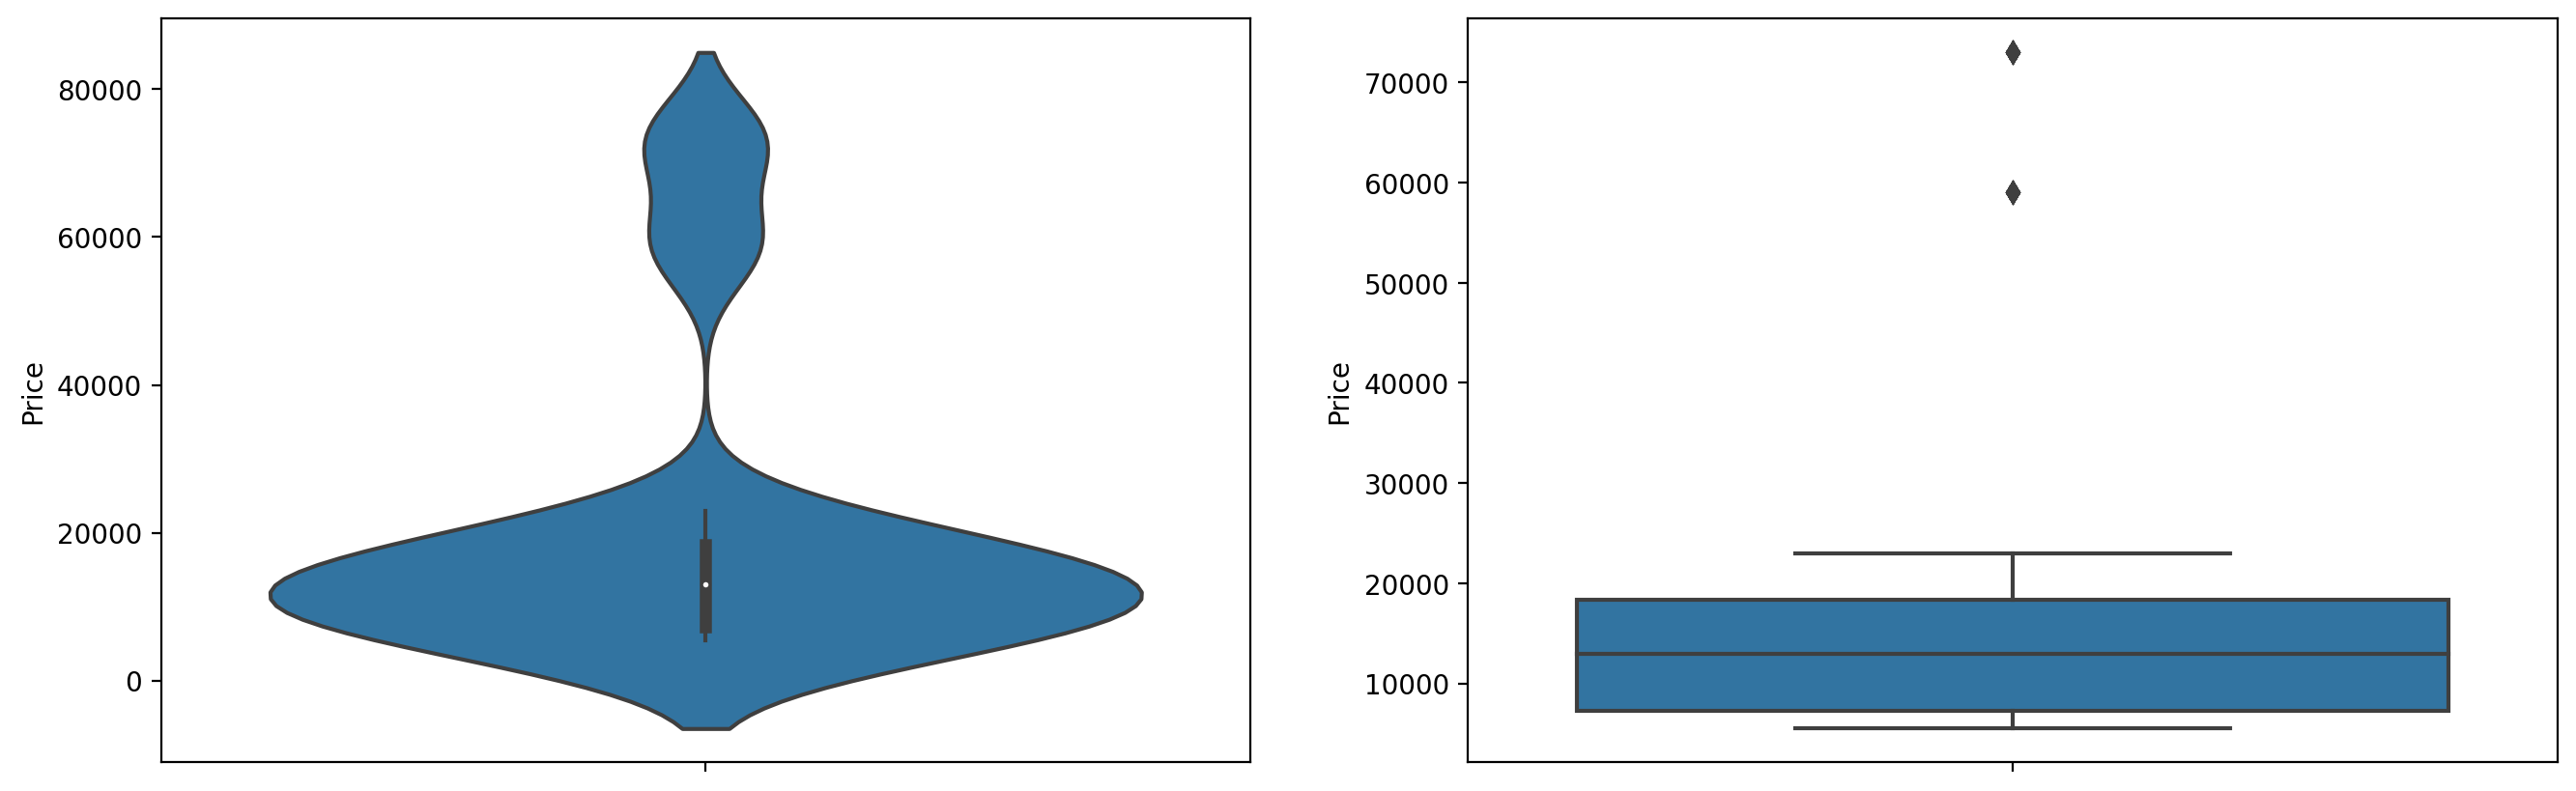

In [40]:
plt.figure(figsize=(16,5),dpi=200)
plt.subplot(1,2,1)
sns.violinplot(y='Price',data=flipkart)
plt.subplot(1,2,2)
sns.boxplot(y='Price',data=flipkart) #most of phone price ranges from 10 to 20k 

<Figure size 2400x1000 with 0 Axes>

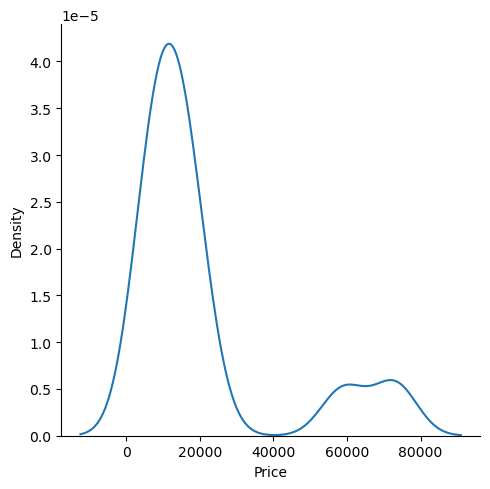

In [41]:
plt.figure(figsize=(12,5),dpi=200)
sns.displot(x=flipkart['Price'],kind='kde') #most price ranges from 10 to 20k 

<Axes: xlabel='RAM', ylabel='count'>

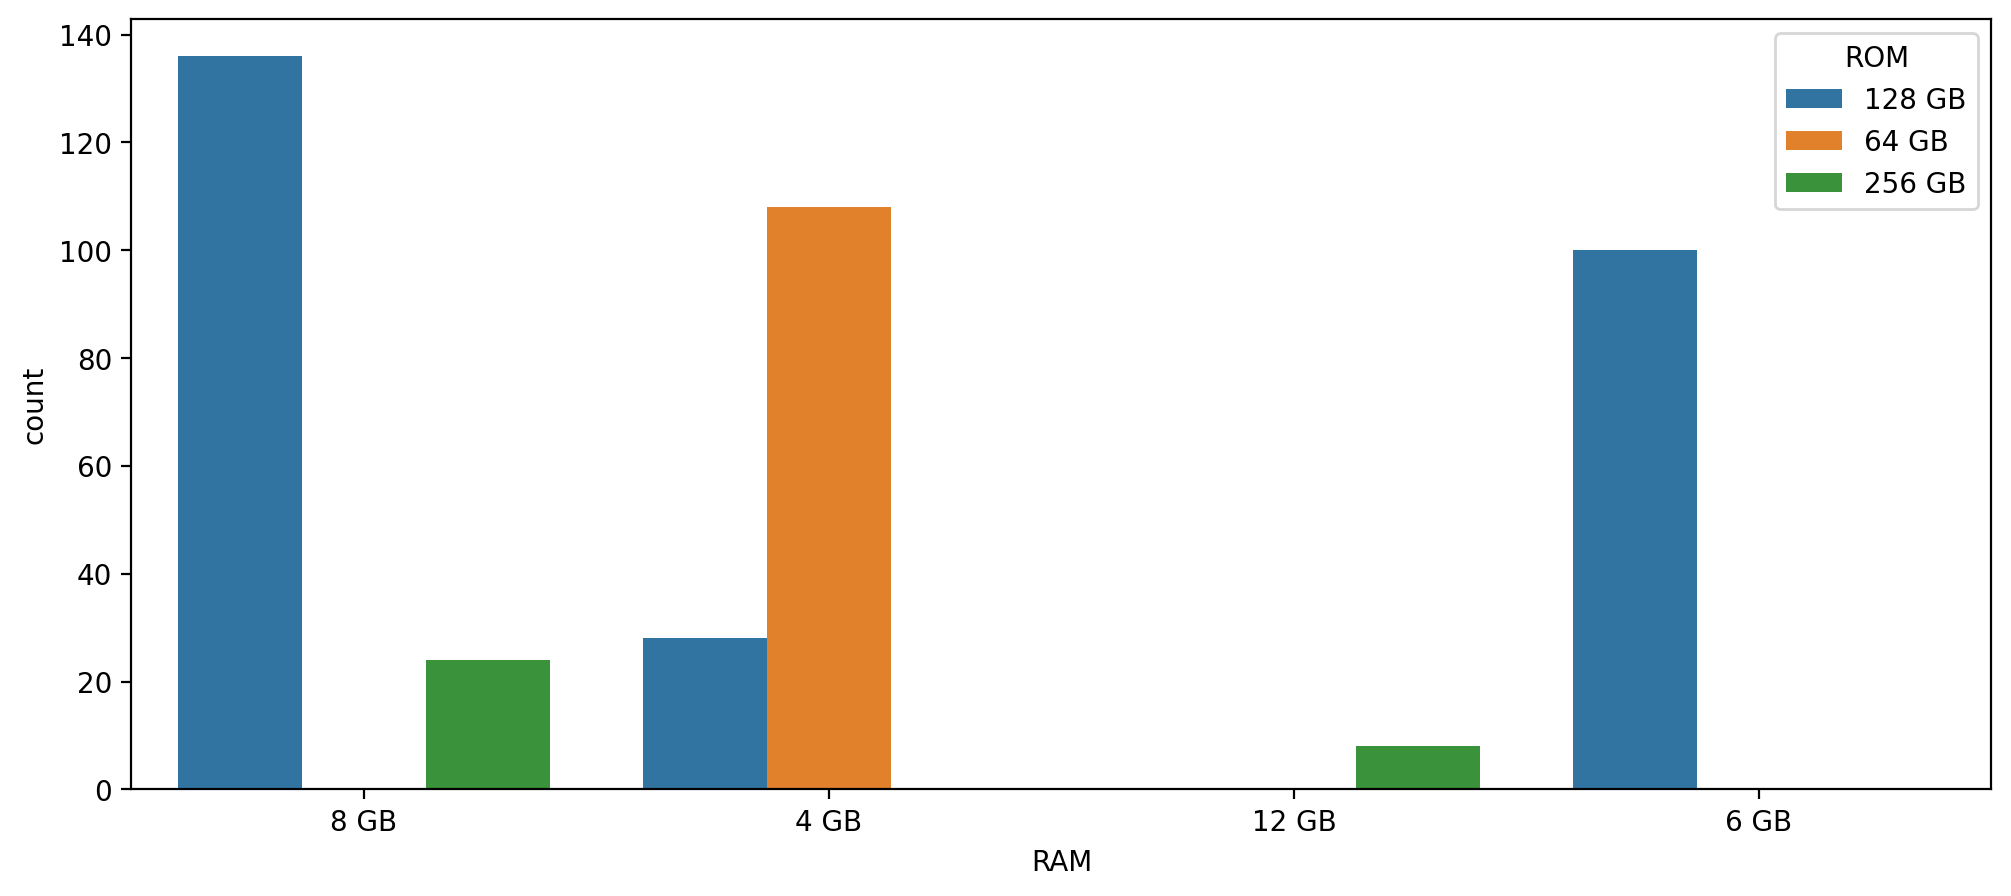

In [42]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='RAM',hue='ROM',data=flipkart) #most available ram is 8gb & rom 128gb

<Axes: xlabel='RAM', ylabel='count'>

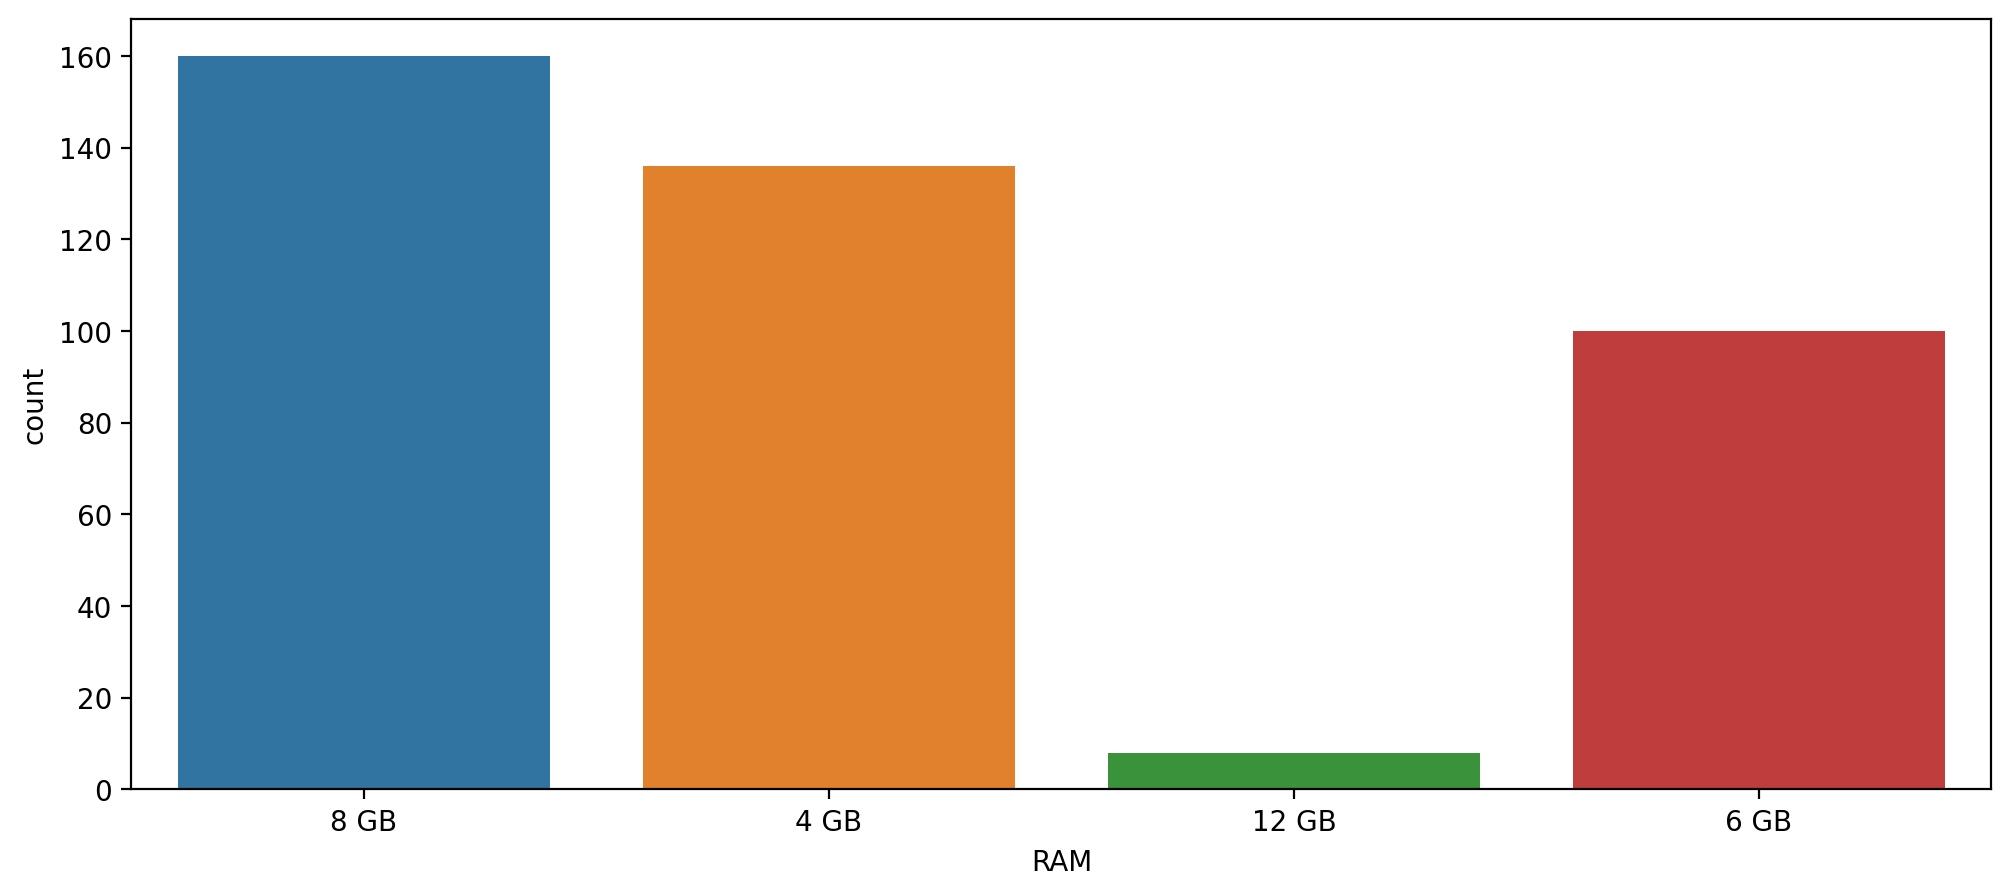

In [43]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='RAM',data=flipkart) #8gb ram is available more

<Axes: xlabel='ROM', ylabel='count'>

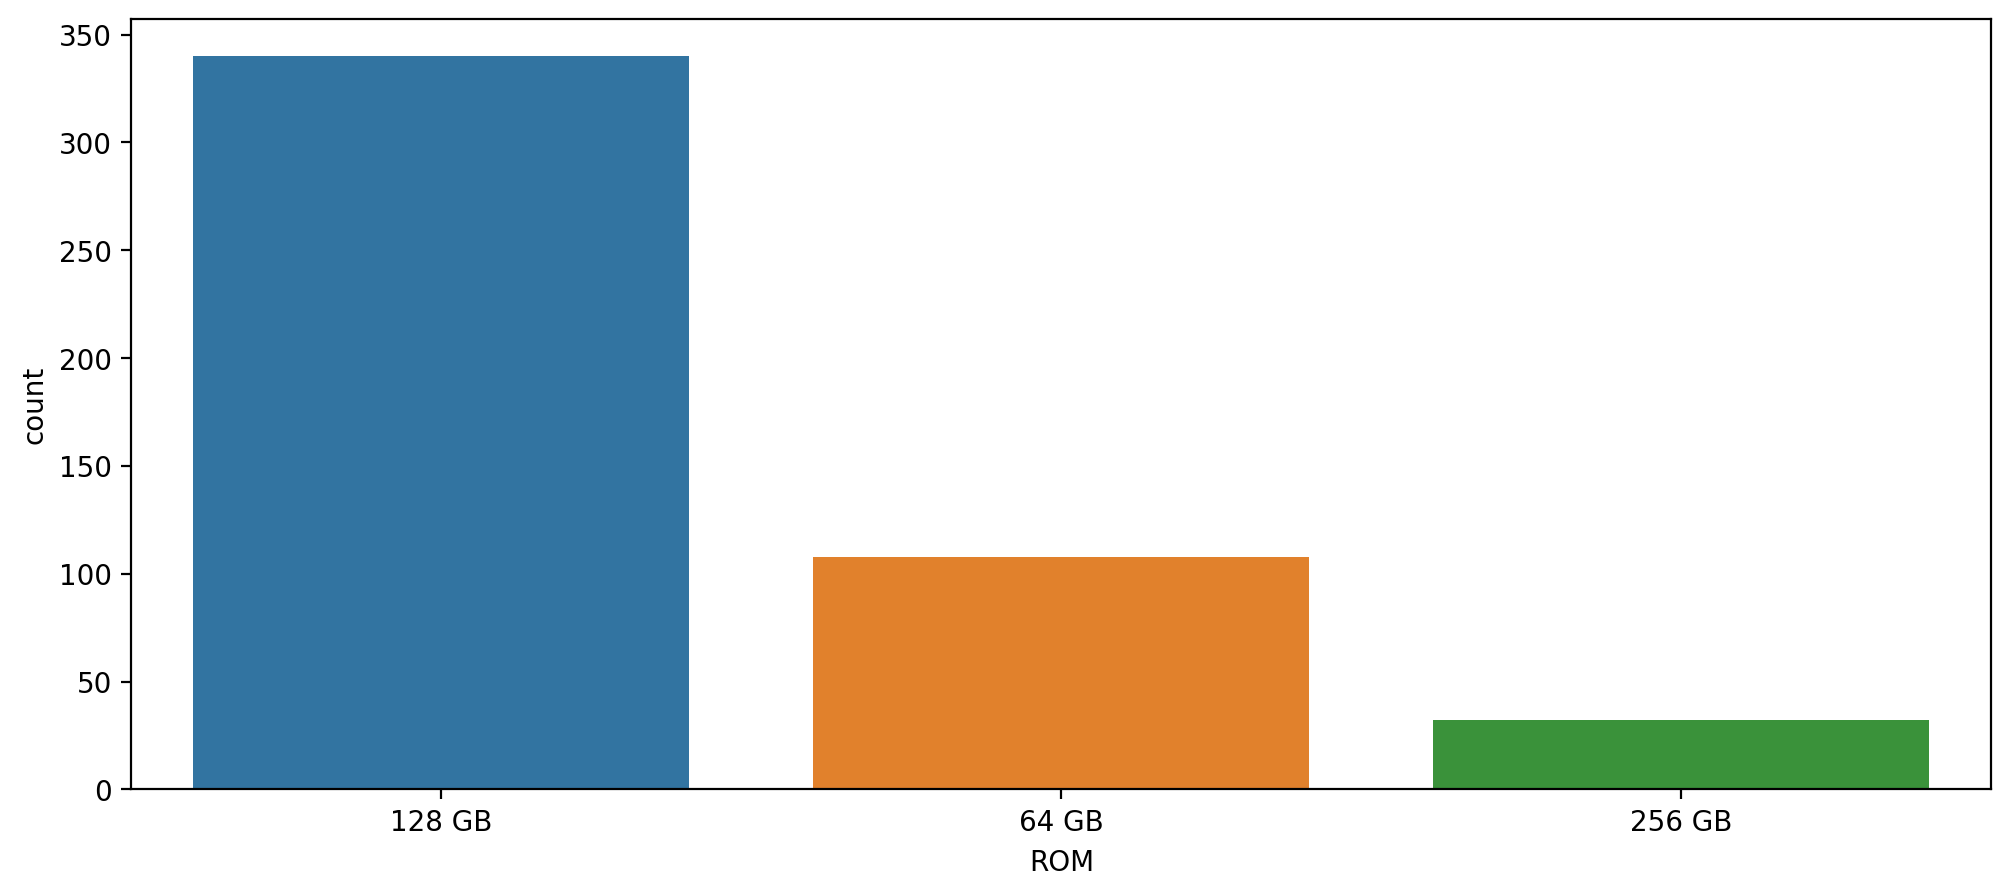

In [44]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='ROM',data=flipkart) #128gb rom is available more

<Axes: xlabel='Battery', ylabel='count'>

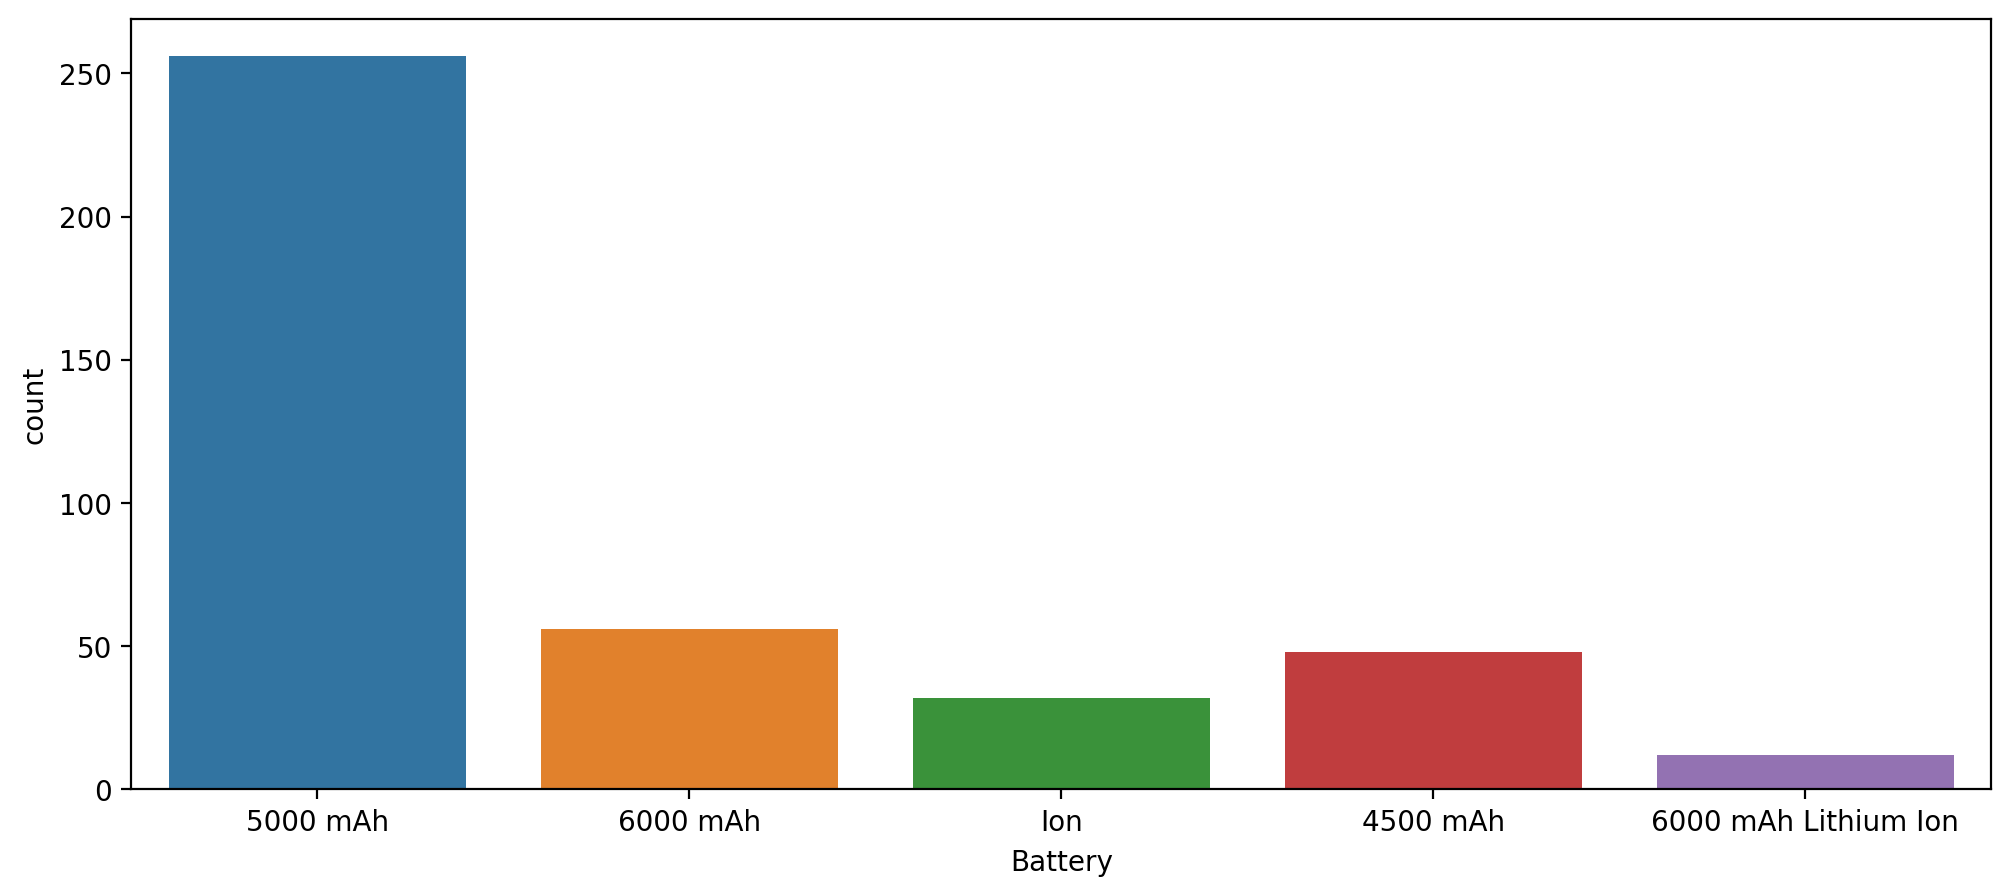

In [45]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='Battery',data=flipkart) #5000mAh available more

<Axes: xlabel='Rating', ylabel='Price'>

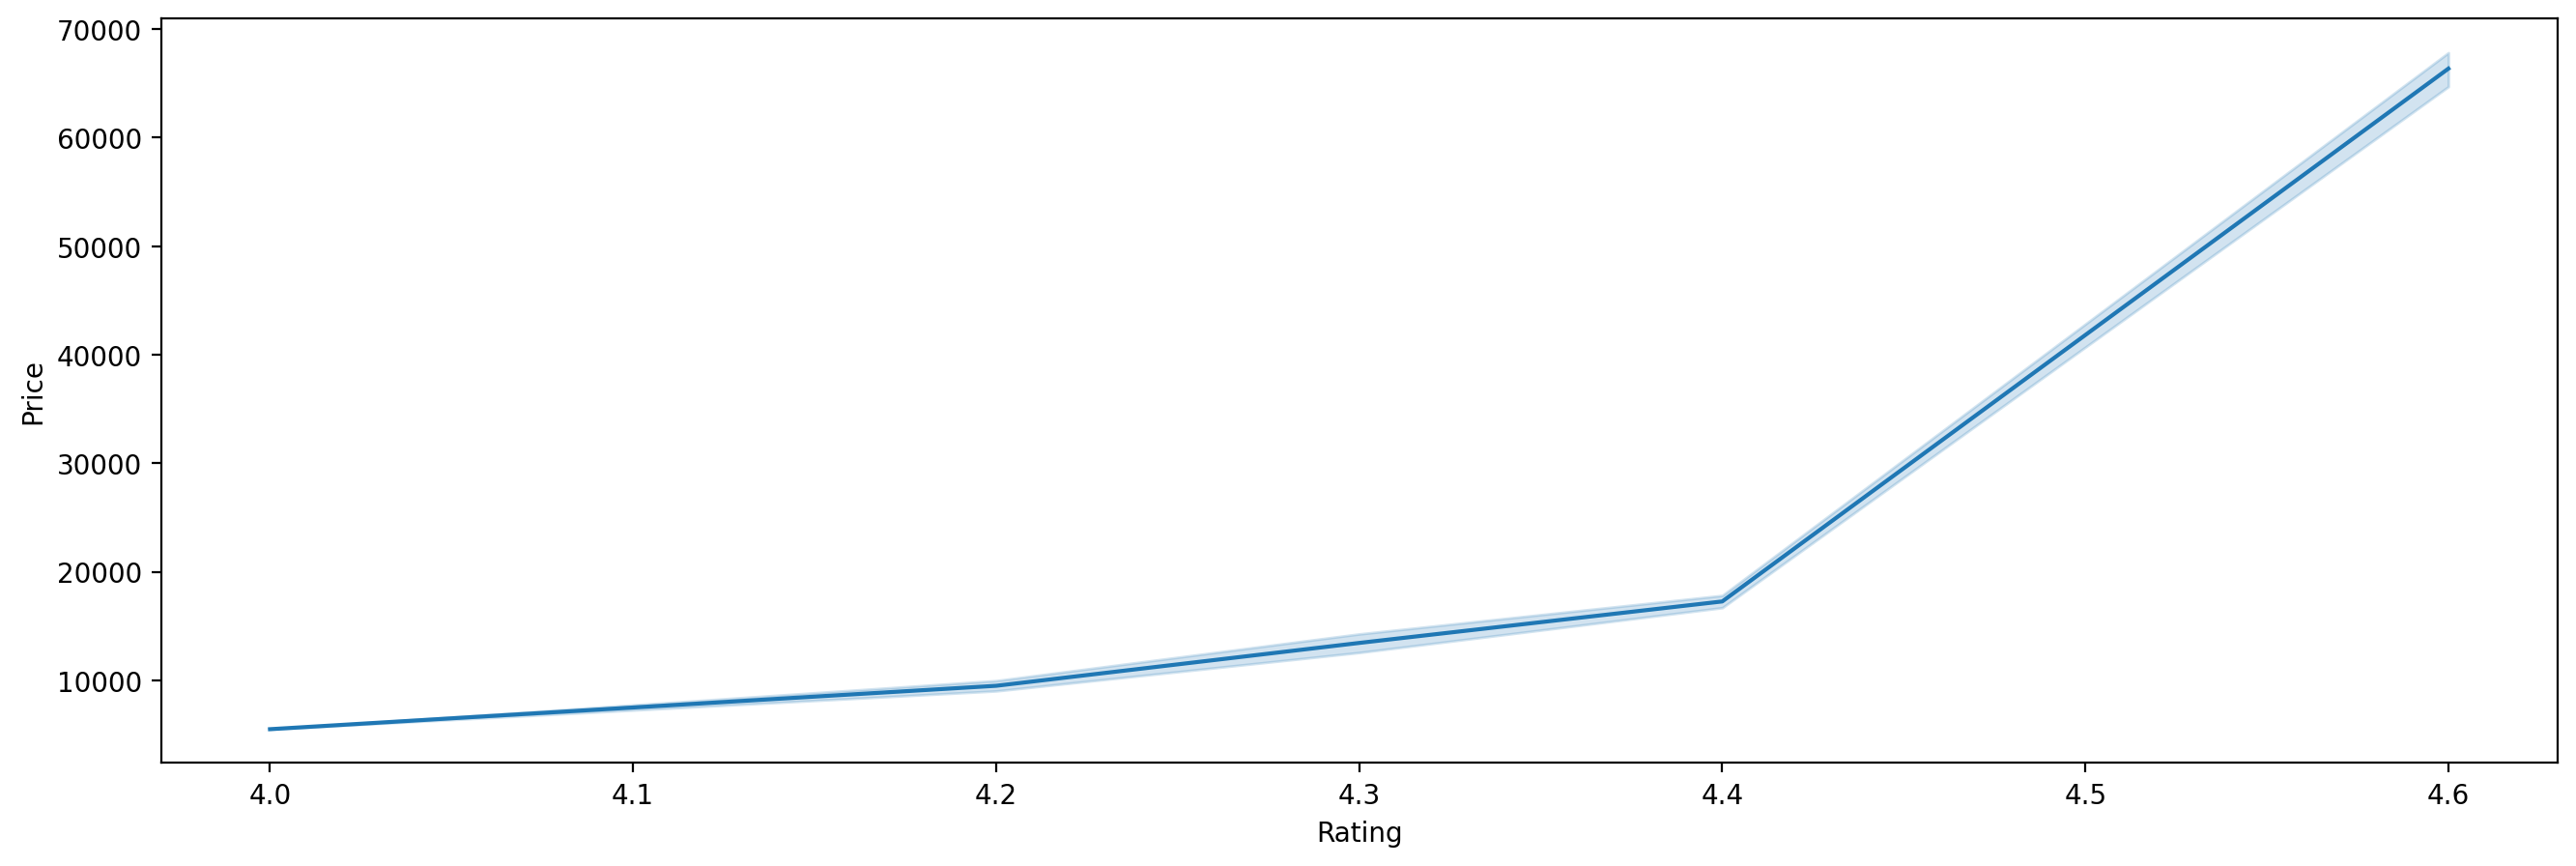

In [46]:
plt.figure(figsize=(16,5),dpi=200)
sns.lineplot(x='Rating',y='Price',data=flipkart) #Expensive phone has high rating

<Axes: xlabel='RAM', ylabel='count'>

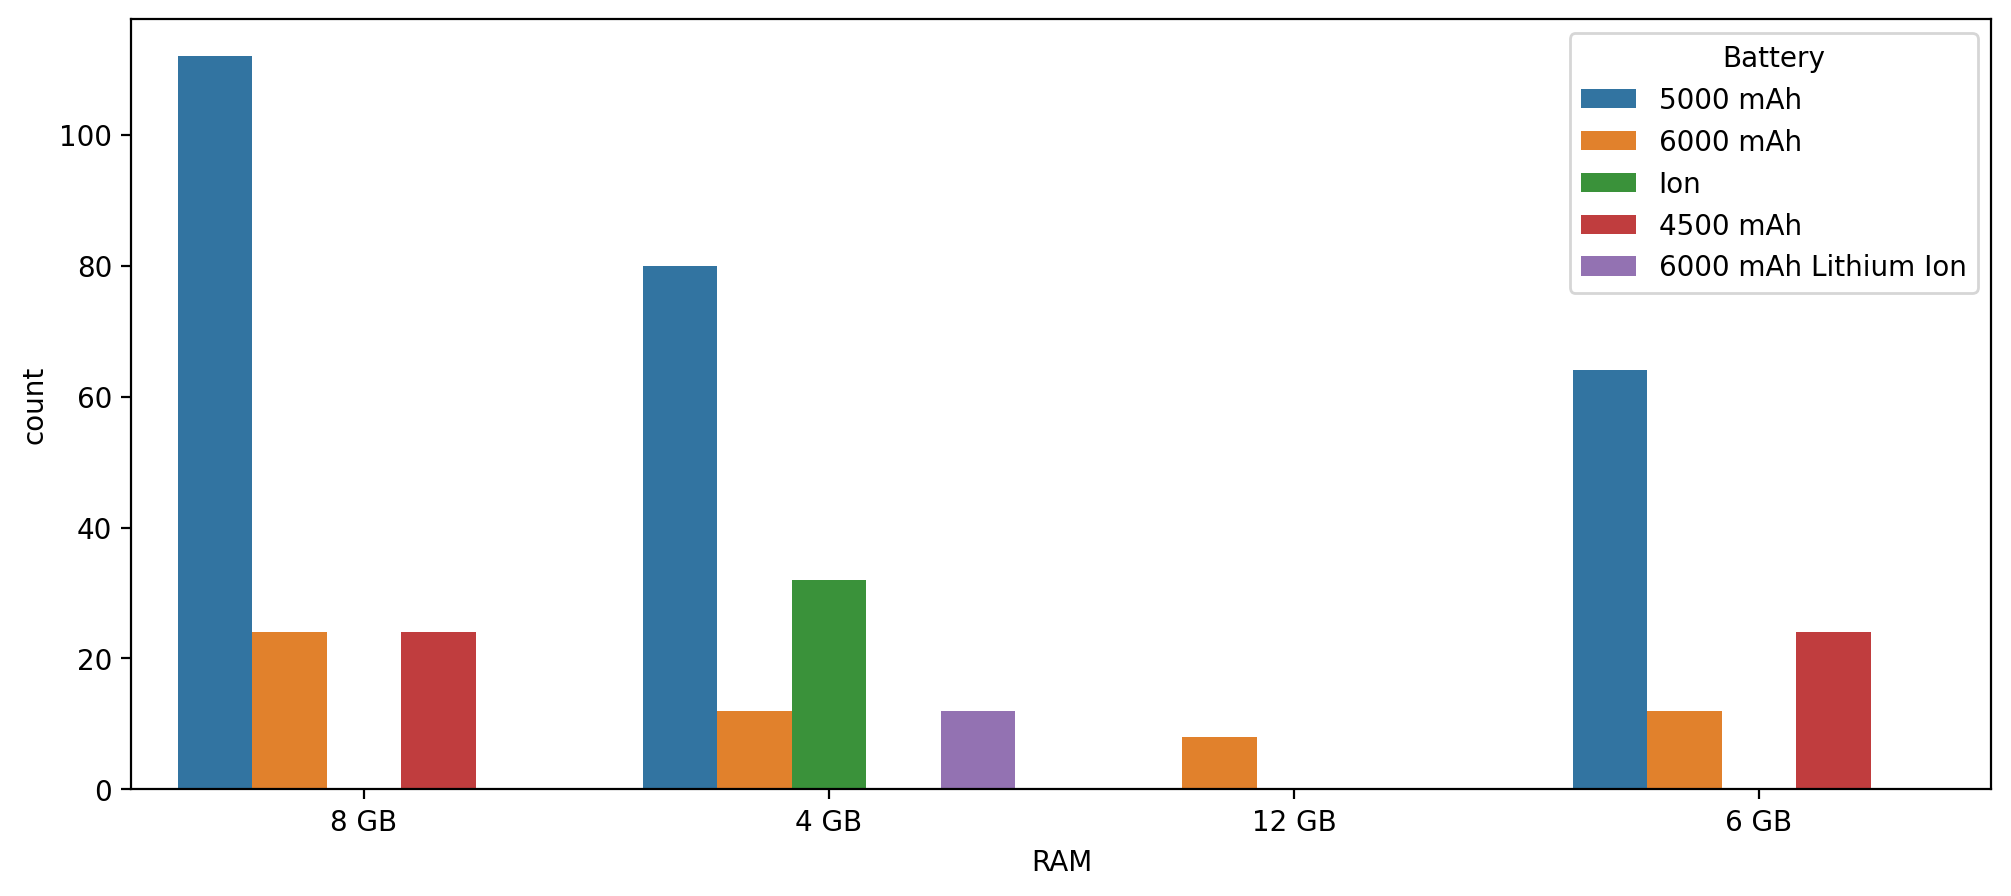

In [47]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='RAM',hue='Battery',data=flipkart) #4gb ram and 5000mAh battery is more available

<Axes: xlabel='ROM', ylabel='count'>

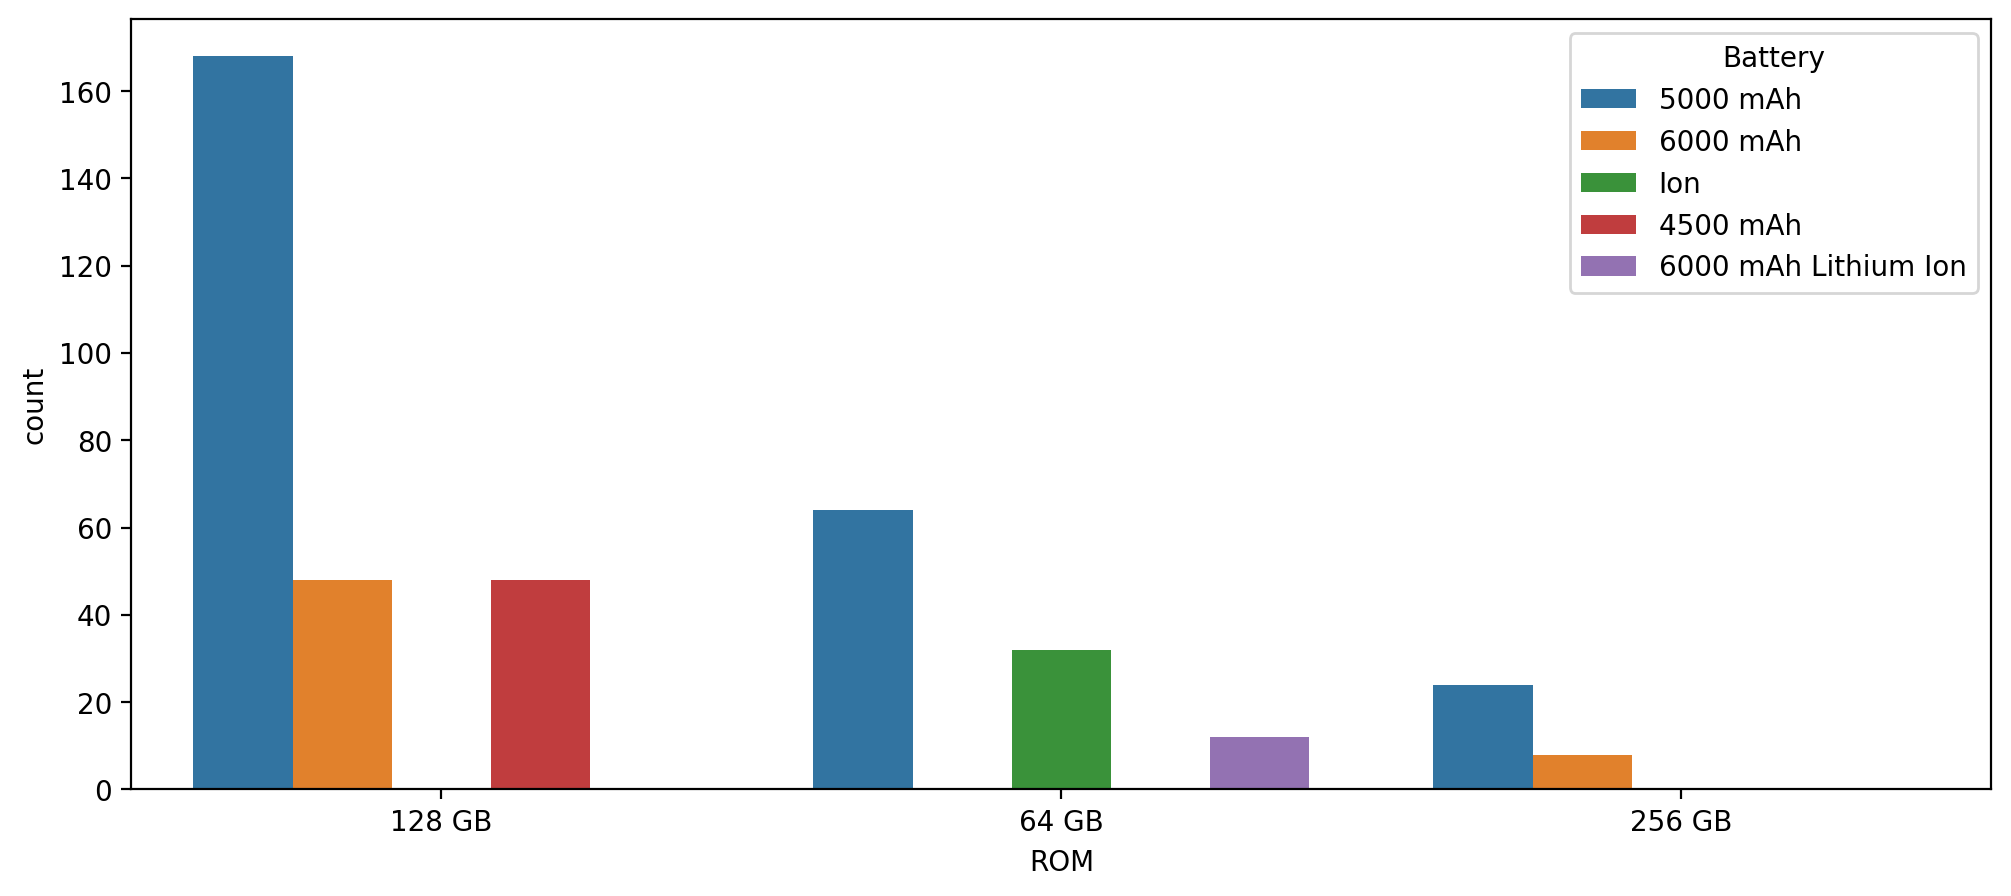

In [48]:
plt.figure(figsize=(12,5),dpi=200)
sns.countplot(x='ROM',hue='Battery',data=flipkart) #128gb rom and 5000mAh battery have high availability